In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
nba_data = pd.read_csv('Seasons_stats.csv')

In [6]:
# 1.The player who participated in the largest number of games
nba_data.sort_values(['G', 'Player'], ascending = [False, True]).head(1)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
2676,2676,1969.0,Walt Bellamy*,C,29.0,TOT,88.0,NaN,3159.0,18.0,...,0.649,NaN,NaN,1101.0,176.0,NaN,NaN,NaN,320.0,1527.0


In [7]:
# 2. Pearson's and Spirmen's correlation
print(nba_data[['Age','G']].corr('pearson'))
print(nba_data[['Age','G']].corr('spearman'))

          Age         G
Age  1.000000  0.027398
G    0.027398  1.000000
          Age         G
Age  1.000000  0.038425
G    0.038425  1.000000


<AxesSubplot:ylabel='Frequency'>

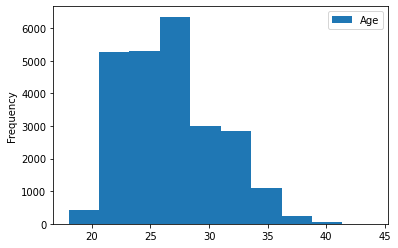

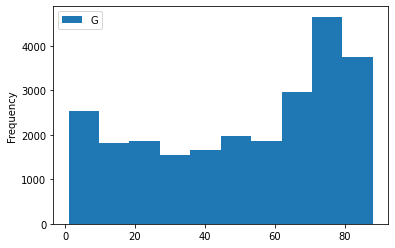

In [9]:
# 2. Histograms
nba_data.plot.hist(x = 'G', y = 'Age')
nba_data.plot.hist(x = 'Age', y = 'G')

In [21]:
# 2. p-value
import scipy.stats as sst
nba_data_G_Age = pd.DataFrame({'G' : nba_data['G'], 'Age' : nba_data['Age']})
nba_data_G_Age = nba_data_G_Age.dropna(how='any')
r, p = sst.pearsonr(nba_data_G_Age['G'], nba_data_G_Age['Age'])
print("p-value: " + str(p))

P-Value: 1.7146738628467893e-05


In [28]:
# 4. Pos-PTS dependecy
nba_data_Pos_PTS = nba_data[['Pos', 'PTS']].dropna(how='any')
print("Most efficiently: \n" + str(nba_data_Pos_PTS[['Pos', 'PTS']].max()))
print()
print("Least efficiently: \n" + str(nba_data_Pos_PTS[['Pos', 'PTS']].min()))

Most efficiently: 
Pos     SG-SF
PTS    4029.0
dtype: object

Least efficiently: 
Pos      C
PTS    0.0
dtype: object


<AxesSubplot:ylabel='Frequency'>

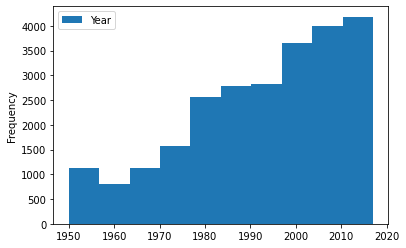

In [29]:
# 5. Year-hist
nba_data.plot.hist(y ='Year')

In [42]:
# 6. Delete NaN-value
print("With NaN: " + str(nba_data.size))
print("Without NaN(axis=1, how='any'): " + str((nba_data.dropna(axis = 1, how='any')).size))
print("Without NaN(axis=1, how='all'): " + str((nba_data.dropna(axis = 1, how='all')).size))
print("Without NaN(axis=0, how='any'): " + str((nba_data.dropna(axis = 0, how='any')).size))
print("Without NaN(axis=0, how='all'): " + str((nba_data.dropna(axis = 0, how='all')).size))

With NaN: 1308623
Without NaN(axis=1, how='any'): 24691
Without NaN(axis=1, how='all'): 1259241
Without NaN(axis=0, how='any'): 0
Without NaN(axis=0, how='all'): 1308623


In [46]:
# 7. Adding new feature (Age*PTS)
nba_data['APTS'] = nba_data['Age'] * nba_data['PTS']
nba_data.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,APTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0,14198.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0,8091.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0,10950.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0,1512.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0,1416.0


In [45]:
# 8. Most popular name.
nba_data['Player'].value_counts()[:].head(1)

Eddie Johnson    33
Name: Player, dtype: int64

In [89]:
# 8. Most-popular name (with parser)
players_name = nba_data['Player']
print("Initial duplicates count: " + str(players_name.duplicated().sum()))
players_name = players_name.dropna().drop_duplicates().reset_index(drop=True)
print("After drop duplicates count: " + str(players_name.duplicated().sum()))
players_name.str.split()

new_name = []
 
for i in range(0, players_name.size-1):
    new_name.append(players_name[i][:players_name[i].find(" ")+1])
    
print("Most populat firstname: " + max(set(new_name), key = new_name.count))

Initial duplicates count: 20769
After drop duplicates count: 0
Most populat firstname: John 


In [93]:
# 3. With loop
mp_year = pd.DataFrame({'MP' : nba_data['MP'], 'Year' : nba_data['Year']})
mp_year = mp_year.dropna(how='any').reset_index(drop=True)

curr_freq_counter = 0
curr_max_freq_year = 0
curr_max_freq = 0
mp_sum = 0

for i in range(0, len(mp_year)-1):
    if (mp_year['Year'][i] == mp_year['Year'][i+1]):
        mp_sum += mp_year['MP'][i]
        curr_freq_counter+=1
    else:
        #freq_dict[mp_year['Year'][i]] = [round(mp_sum / curr_freq_counter, 1)]
        if (curr_max_freq < (round(mp_sum / curr_freq_counter,1))):
            curr_max_freq = round(mp_sum / curr_freq_counter,1)
            curr_max_freq_year = mp_year['Year'][i]
        curr_freq_counter = 0
        mp_sum = 0
print("Most intensely played in year " + str(curr_max_freq_year)) 

Most intensely played in year 1967.0
1967.0
